In [1]:
library(Signac)
library(Seurat)
library(ggplot2)

Warning message:
“package ‘Signac’ was built under R version 4.2.3”
Signac built for for SeuratObject v4 was just loaded with SeuratObject
v5; disabling v5 assays and validation routines, and ensuring assays
work in strict v3/v4 compatibility mode

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
seurat <- readRDS("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/seurat_endocrine_with_links_long_range.rds")

In [3]:
markers_fev_delta0 <- read.csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/marker_peak_analysis/diff_peaks_signac_fev_delta0.csv")

In [4]:
endocrine_cell_types_red <- c(
    "Eps. progenitors",
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
)

In [5]:
cols <- c( 'Prlf. Ductal'='#f7b6d2', 'Ductal'='#d62728', 'Imm. Acinar'='#ffeb3b', 'Mat. Acinar'='#98df8a',
    'Alpha'='#1f77b4', 'Beta'='#ff7f0e', 'Delta'='#279e68', 'Eps. progenitors'='#aa40fc', 'Epsilon'='#8c564b',
       'Fev+'='#e377c2', 'Fev+ Alpha'='#b5bd61', 'Fev+ Beta'='#42f5ec', 'Fev+ Delta'='#aec7e8', 'Fev+ Delta,0'='#17becf', 'Fev+ Delta,1'='#98df8a',
         'Ngn3 high cycling'='#adf542',
        'Ngn3 high,0'='#ff9896', 'Ngn3 high'='#ff9896', 'Ngn3 high,1'='#f0b98d', 'Ngn3 low'='#c5b0d5')

In [6]:
Idents(seurat) = seurat@meta.data[["cell_type_refined"]]

In [7]:
endocrine_cell_types = c('Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high,0', 'Ngn3 high,1', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta,0', 'Fev+ Delta,1', 'Alpha', 'Beta', 'Delta', 'Epsilon')
Idents(seurat) <- factor(Idents(seurat), levels = endocrine_cell_types)

In [8]:
seurat <- subset(x=seurat, idents= endocrine_cell_types_red)

In [10]:
head(markers_fev_delta0,1)

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9-16183628-16184537,9.937382e-16,2.715458,0.112,0.018,2.501e-10


In [18]:
range <- markers_fev_delta0$X[[3]]

In [19]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 55 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


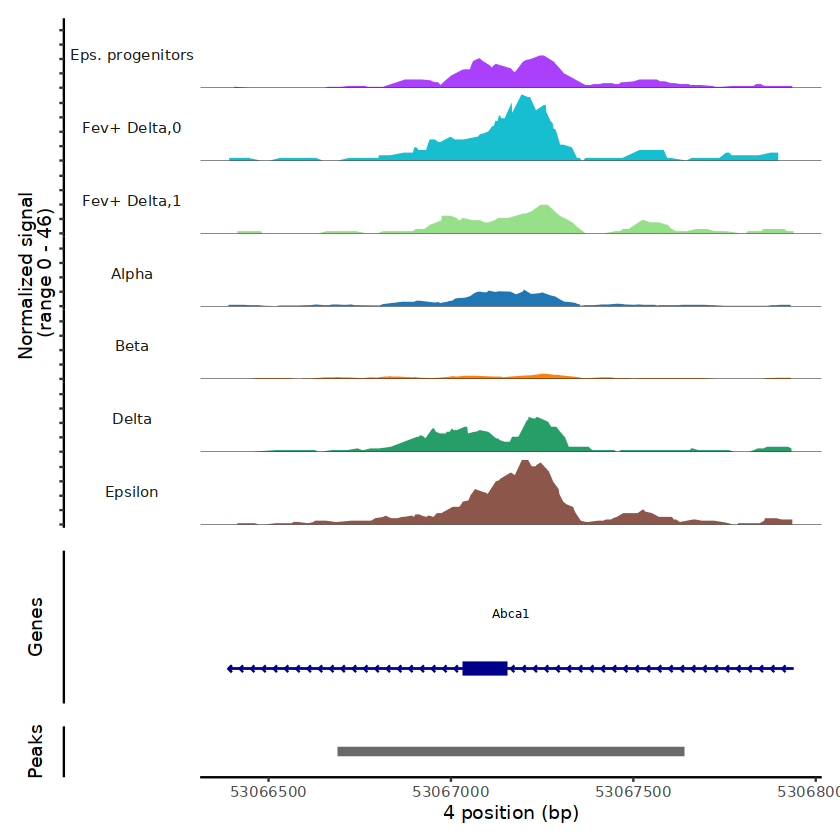

In [20]:
p & scale_fill_manual(values=cols)